In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Определим функцию сглаживания временного ряда, она понадобится позже.

Например:
1. Метод скользящего окна. Параметр window задает ширину окна усреднения значений.

    ``return ts.rolling(window=5).mean()``

2. Метод экспоненциального сглаживания (метод Хольта-Уинтерса)


   варианты для параметра trend: "add", "mul", "additive", "multiplicative", None


   варианты для параметра seasonal: "add", "mul", "additive", "multiplicative", None


   seasonal_periods задает для модели предполагаемый интервал сезонности, когда ВР будет иметь похожие уровни и тенденции

   ``model = ExponentialSmoothing(ts, trend="additive", seasonal="additive", seasonal_periods=5)``
   ``return model.fit().fittedvalues``

In [2]:
def smooth_time_series(ts):
    model = ExponentialSmoothing(ts, trend="additive", seasonal="additive", seasonal_periods=5)
    return model.fit().fittedvalues

Для чтения из файла необходимо взять временные ряды из предложенных наборов и сохранить в csv файл как показано в примере, сформировав датасет

In [3]:
dataset = pd.read_csv("ts2.csv", delimiter=";")

после того как файл был прочтен, можно вывести содержимое временных рядов в консоль

In [4]:
print(dataset)

    first     second  third
0       3   2.500000      1
1       2   2.833333      2
2       3   2.966667      3
3       3   3.066667      4
4       4   4.383333      5
5       6   6.466667      6
6       5   5.416667      7
7       5   5.433333      8
8       5   5.583333      9
9       5   5.683333     10
10      5   5.150000     11
11      5   5.633333     12
12      6   6.033333     13
13     12  12.866667     14
14      6   6.783333     15
15      6   6.500000     16


Для выполнения первой части задания необходимо подобрать метод и параметры сглаживания временного ряда. Для этого выше реализован пример функции ``smooth_time_series``

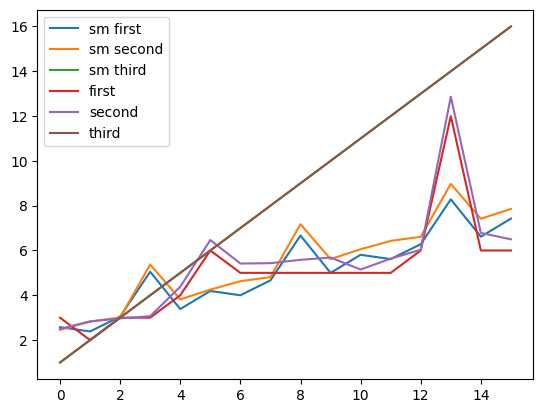

In [5]:
sds = dataset.apply(smooth_time_series)

plt.plot(sds)
plt.plot(dataset)
plt.legend(['sm first', 'sm second', 'sm third', 'first', 'second', 'third'])
plt.show()

Выполним нормализацию. Варианты: MinMaxScaler; MaxAbsScaler; RobustScaler; StandardScaler

In [6]:
df = pd.DataFrame(MinMaxScaler().fit_transform(sds), columns=sds.columns)
print(df)

       first    second     third
0   0.032607  0.000000  0.000000
1   0.000000  0.057355  0.066665
2   0.113045  0.085473  0.133331
3   0.452163  0.447628  0.199999
4   0.169570  0.209032  0.266668
5   0.306525  0.276186  0.333334
6   0.273918  0.333541  0.399998
7   0.386964  0.361659  0.466664
8   0.726082  0.723814  0.533332
9   0.443488  0.485218  0.600001
10  0.580444  0.552372  0.666667
11  0.547837  0.609727  0.733331
12  0.660882  0.637845  0.799997
13  1.000000  1.000000  0.866665
14  0.717407  0.761404  0.933334
15  0.854362  0.828558  1.000000


Расчет степени корреляции между сглаженными временными рядами

In [7]:
matrix = df.corr()
print(matrix)

           first    second     third
first   1.000000  0.992092  0.904237
second  0.992092  1.000000  0.916556
third   0.904237  0.916556  1.000000


Для примера сравним корреляцию для несглаженных временных рядов

In [8]:
matrix2 = dataset.corr()
print(matrix2)

           first    second     third
first   1.000000  0.990651  0.704796
second  0.990651  1.000000  0.722877
third   0.704796  0.722877  1.000000


Визуализация матрицы корреляции:

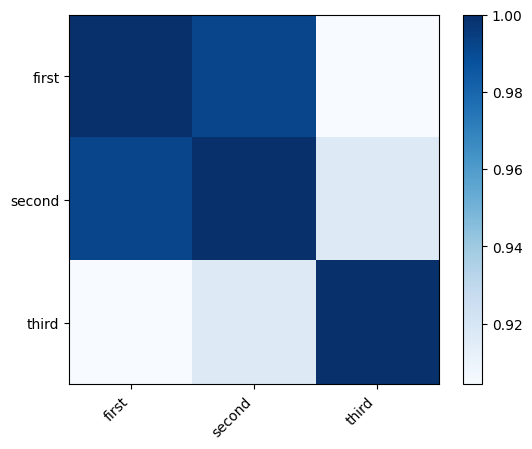

In [9]:
plt.imshow(matrix, cmap='Blues')
plt.colorbar()
variables = []
for i in matrix.columns:
    variables.append(i)
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)
plt.show()